In [1]:
import tensorflow as tf

from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
noise = np.random.uniform(-50, 50, 100)

In [13]:
X = np.linspace(-20, 20, 100)

In [14]:
y = 3 * X * X + 5 * X + 10 + noise

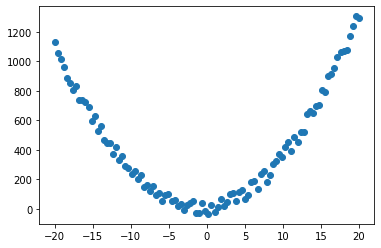

In [15]:
plt.scatter(X, y)

In [16]:
X_mod = (X - X.mean())/X.std()

In [17]:
Y_mod = (y - y.mean())/y.std()

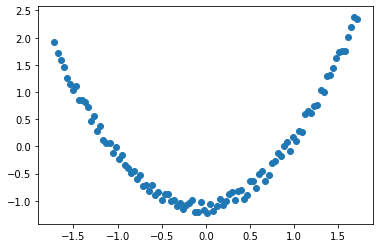

In [18]:
plt.scatter(X_mod, Y_mod)

In [83]:
X_tf = tf.constant(X_mod, dtype="float64")
Y_tf = tf.constant(Y_mod, dtype="float64")

In [84]:
a = tf.Variable(0., dtype="float64")
b = tf.Variable(0., dtype="float64")
c = tf.Variable(0., dtype="float64")

In [85]:
iters, lr = 100, .1

In [86]:
def gradient_dec(X, Y):
    
    with tf.GradientTape() as tape:
        y_h = a * X * X + b * X + c
        error = Y - y_h
        loss = tf.reduce_mean(error ** 2)

        da, db, dc = tape.gradient(loss, [a, b, c])
        
        a.assign_sub(lr*da)
        b.assign_sub(lr*db)
        c.assign_sub(lr*dc)
        
        return loss
    
    

In [87]:
for i in range(iters):
    gradient_dec(X_tf, Y_tf)

In [88]:
yp = a * X_tf * X_tf + b * X_tf + c

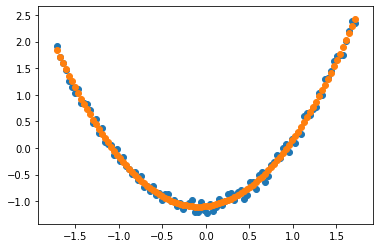

In [89]:
plt.scatter(X_tf, Y_tf)
plt.scatter(X_tf, yp)